Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Считаем таблицу и выведем информацию на экран

In [2]:
car_data = pd.read_csv('data/raw/car_data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       280 non-null    object 
 1   Year           280 non-null    int64  
 2   Selling_Price  280 non-null    float64
 3   Present_Price  280 non-null    float64
 4   Kms_Driven     280 non-null    int64  
 5   Fuel_Type      280 non-null    object 
 6   Seller_Type    280 non-null    object 
 7   Transmission   280 non-null    object 
 8   Owner          280 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 19.8+ KB


Разделим данные на качественные и количественные 

In [5]:
numerical = ['Year','Present_Price','Kms_Driven','Selling_Price']
categorical = ['Car_Name','Fuel_Type','Seller_Type','Transmission','Owner']

In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2013.650000,4.619357,7.470929,36891.053571,0.042857
std,2.893386,4.895451,7.296562,39687.308745,0.250345
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.795000,1.050000,15000.000000,0.000000
50%,2014.000000,3.500000,6.445000,31802.000000,0.000000
75%,2016.000000,6.175000,9.910000,49000.000000,0.000000
max,2018.000000,33.000000,36.230000,500000.000000,3.000000


Представим данные по названию машин в числовом виде

In [12]:
for name in car_data['Car_Name']:
    car_data = car_data.replace(name,name.title())
values,counts=np.unique(car_data['Car_Name'],return_counts=True)
unique_cars_counts = pd.DataFrame({'car names':values, 'counts':counts})
for i in unique_cars_counts['car names']:
    idx = pd.Index(unique_cars_counts['car names'])
    car_data = car_data.replace(i,idx.get_loc(i))


Категоризируем остальные качественные значения

In [13]:
car_data = car_data.replace('Petrol',0)
car_data = car_data.replace('Diesel',1)
car_data = car_data.replace('CNG',2)

car_data = car_data.replace('Dealer',0)
car_data = car_data.replace('Individual',1)

car_data = car_data.replace('Manual',0)
car_data = car_data.replace('Automatic',1)

In [14]:
car_data[categorical].astype('int64')

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
0,70,0,0,0,0
1,79,1,0,0,0
2,23,0,0,0,0
3,87,0,0,0,0
4,78,1,0,0,0
...,...,...,...,...,...
275,24,1,0,0,0
276,21,0,0,0,0
277,24,0,0,0,0
278,24,1,0,0,0


Построим столбчатые диаграммы параметров с количеством машин по оси У для количественных и качественных данных

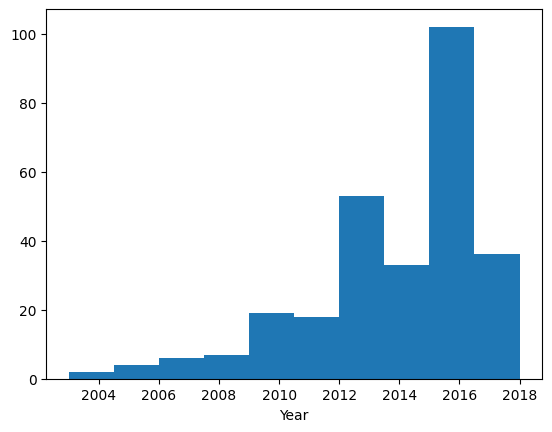

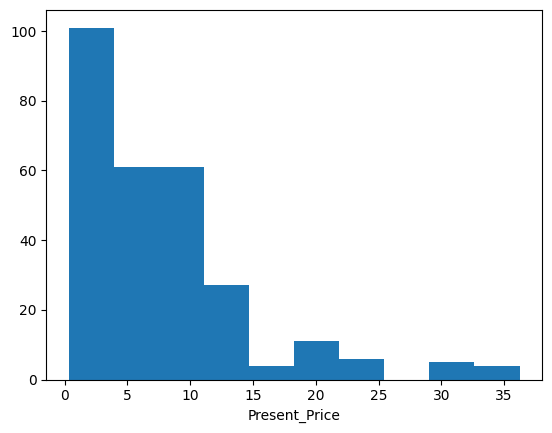

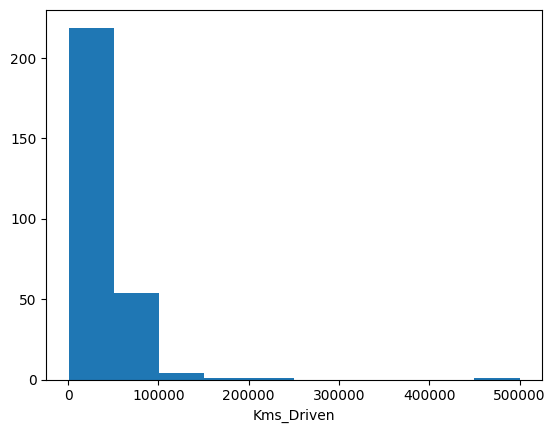

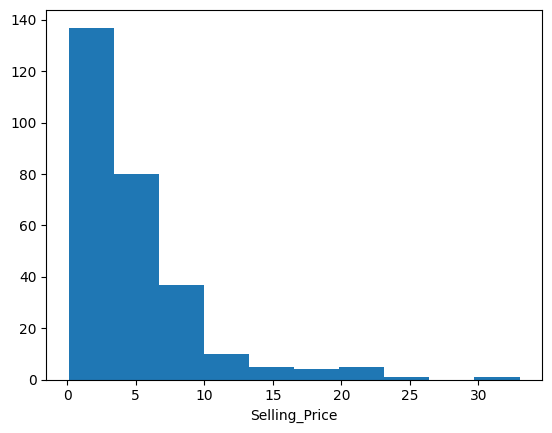

In [16]:
for i in car_data[numerical].columns:
    plt.hist(car_data[numerical][i])
    plt.xlabel(i)
    plt.show()

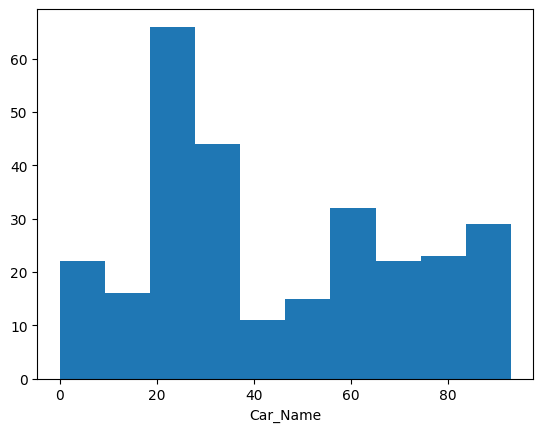

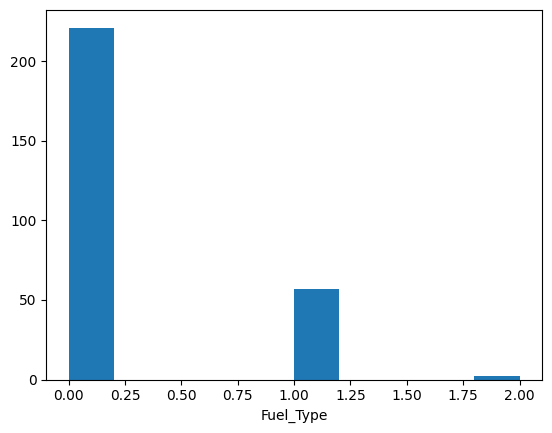

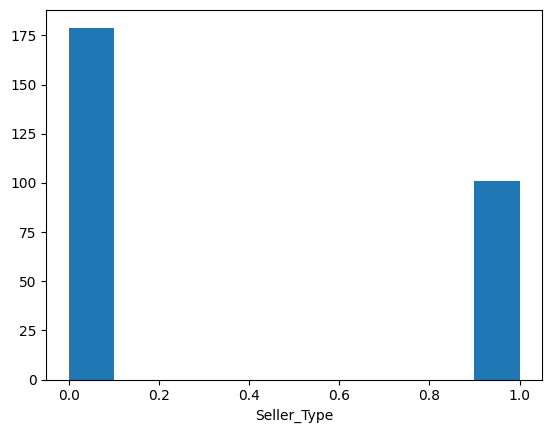

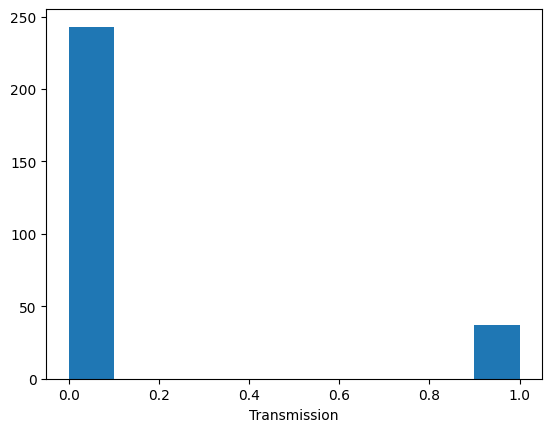

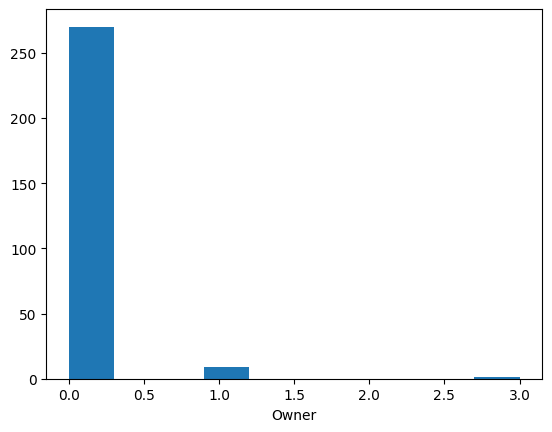

In [17]:
for i in car_data[categorical].columns:
    plt.hist(car_data[categorical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.show()

Исходя из полученных результатов, можно сделать вывод о том, что все представенные в таблице столбцы зависят друг от друга и представляют полезную информацию для анализа, особенно при переводе качественных данных в числовой вид. В действительности так и происходит - на цену автомобиля влияет куча факторов, каждый в уникальном случае вносит свой особенный вес в итоговую стоимость. Поэтому не следует избавляться от имеющихся столбцов за ненадобностью.